In [1]:
"""
This code belongs to the paper:
-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 21 Storey building.
"""

'\nThis code belongs to the paper:\n-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 21 Storey building.\n'

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Actual data

file_data = "MDOF_actual_relia.p"
fileobj_data = open(file_data, 'rb')
MDOF = pickle.load(fileobj_data)

output = MDOF
output = np.array(output)

In [2]:
file_data_F = 'MDOF_Final_relia_dt_0.001_T_3_sec.p' # Prediction data
fileobj_data_F = open(file_data_F, 'rb')
MDOF_F = pickle.load(fileobj_data_F)

output_F = MDOF_F
output_F = np.array(output_F)

## Y1 Actual

In [10]:
output.shape

(10000, 3001)

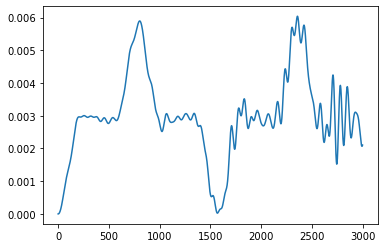

In [3]:
plt.plot(np.mean(output, axis=0))

Probability of Failure : 0.0228


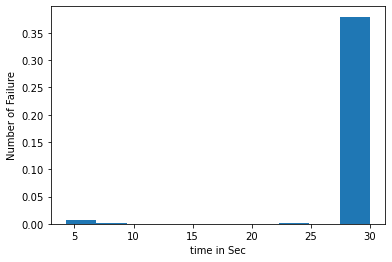

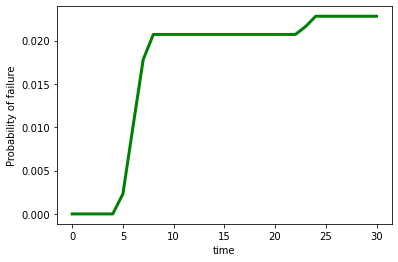

Probability of Failure : 0.0222


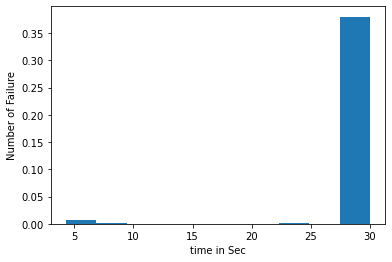

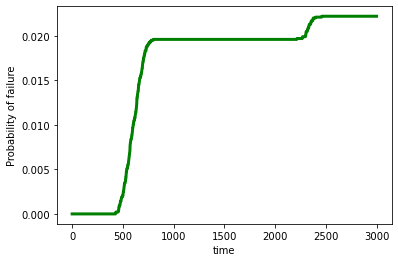

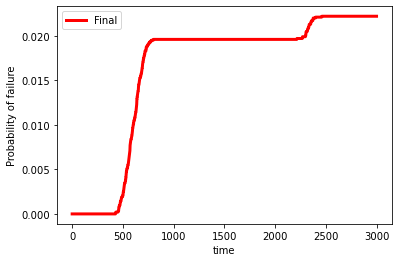

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [191]:
threshold = 2.5
ensem = output.shape[0]
time = output.shape[1] 

import matplotlib.pyplot as plt

idx = [np.where(output[i,:]>threshold) for i in range(ensem)]
# idx
count = 0 
for i in idx:
    if len(i[0]) != 0:
        count += 1
print("Probability of Failure :", count/ensem)


ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/100)
    else:
        ans.append(time/100)
        
plt.hist(ans, density=True)
plt.xlabel('time in Sec')
plt.ylabel('Number of Failure')
plt.show()


pf_count_per_t_1 = set() 
prob_fail_1 = []


for i in range(time):
    
    colmn = output[:, i]
    ans = np.where(colmn > threshold)
    for i in ans[0]:
        pf_count_per_t_1.add(i)
    
    no_of_fail_1 = len(pf_count_per_t_1)
    prob_fail_1.append(no_of_fail_1/ensem)
    
    
final_pf = []
for i in range(len(prob_fail_1)):
    if i%100==0:
        final_pf.append(prob_fail_1[i])

plt.plot(final_pf,color='green',linewidth=3)
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.show()


ensem_F = output_F.shape[0]
time_F = output_F.shape[1] 


idx_F = [np.where(output_F[i,:]> threshold) for i in range(ensem_F)]
# idx
count_F = 0 
for i in idx_F:
    if len(i[0]) != 0:
        count_F += 1
        
print("Probability of Failure :", count_F/ensem_F)


ans_F = []
for i in idx_F:
    if len(i[0])!=0:
        ans_F.append((i[0][0])/100)
    else:
        ans_F.append(time_F/100)
        
plt.hist(ans_F, density=True)
plt.xlabel('time in Sec')
plt.ylabel('Number of Failure')
plt.show()


pf_count_per_t_1_F = set() 
prob_fail_1_F = []


for i in range(time_F):
    
    colmn_F = output_F[:, i]
    ans_F = np.where(colmn_F > threshold)
    for i in ans_F[0]:
        pf_count_per_t_1_F.add(i)
    
    no_of_fail_1_F = len(pf_count_per_t_1_F)
    prob_fail_1_F.append(no_of_fail_1_F/ensem_F)
    
    
final_pf_F = []
for i in range(len(prob_fail_1_F)):
    if i%100==0:
        final_pf_F.append(prob_fail_1_F[i])
    
plt.plot(prob_fail_1_F,color='green',linewidth=3)
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.show()

plt.plot(prob_fail_1='green',linewidth=3, label='Actual')
plt.plot(prob_fail_1_F,color='red',linewidth=3, label='Final')
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.legend()
plt.show()
plt.figure()

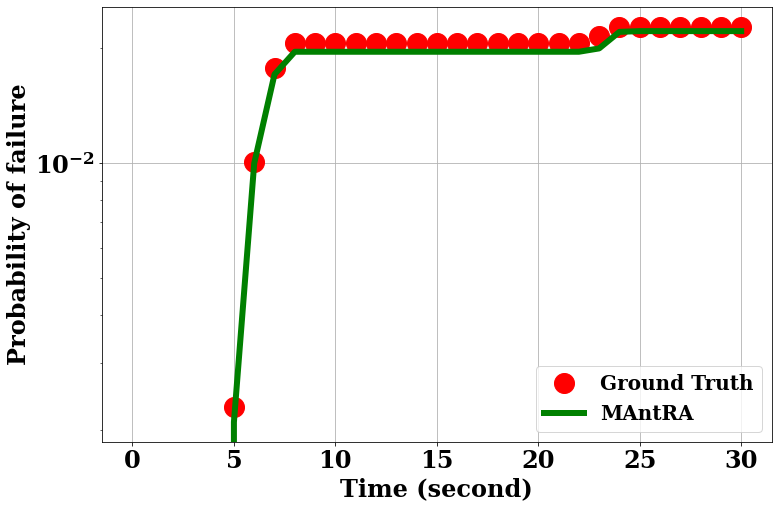

In [203]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 24
plt.figure(figsize = (12,8 ))
plt.semilogy(final_pf, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_pf_F,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=4)
plt.grid()
plt.savefig('reliability Mdofx.pdf')
plt.show()